In [2]:
import pandas as pd
import numpy as np
import os
import sys

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join(os.pardir,'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    


In [3]:
df = pd.read_csv('../raw_data/building/csv_building_damage_assessment.csv', dtype='unicode')



In [4]:
df.shape


(762106, 79)

In [5]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,...,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,...,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,...,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Insignificant/light,None,None,NaN,NaN,Insignificant/light-(<1/3),...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'damage_overall_collapse', 'damage_overall_leaning',
       'damage_overall_adjacent_building_risk', 'damage_foundation_severe',
       'damage_foundation_moderate', 'damage_foundation_insignificant',
       'damage_roof_severe', 'damage_roof_moderate',
       'damage_roof_insignificant', 'damage_corner_separation_severe',
       'damage_corner_separation_moderate',
       'damage_corner_separation_insignificant',
       'damage_diagonal_cracking_severe', 'damage_diagonal_cracking_moderate',
       'damage_diagonal_cracking_insignificant',
       'damage_in_plane_failure_severe', 'damage_in_plane_failure_moderate',
       'damage_in_plane_failure_insignificant',
       'damage_out_of_plane_failure_severe',
       'damage_out_of_plane_failure_moderate',
       'damage_out_of_plane_failure_insignificant',
       'damage_out_of_plane_failure_walls_ncfr_severe',
       'damage_out_of_plane_failure_walls_ncfr_moderate',
   

#### Isolating features informing on building damage to explore, to see if there may be anything that could be useful to add to the modeling dataset.



In [8]:

damage_df= df[['building_id','damage_grade', 'technical_solution_proposed','damage_overall_collapse', 'damage_overall_leaning',
       'damage_overall_adjacent_building_risk', 'damage_foundation_severe',
       'damage_foundation_moderate', 'damage_foundation_insignificant','has_damage_foundation',
              'has_damage_roof',
       'has_damage_corner_separation', 'has_damage_diagonal_cracking',
       'has_damage_in_plane_failure', 'has_damage_out_of_plane_failure',
       'has_damage_out_of_plane_walls_ncfr_failure',
       'has_damage_gable_failure', 'has_damage_delamination_failure',
       'has_damage_column_failure', 'has_damage_beam_failure',
       'has_damage_infill_partition_failure', 'has_damage_staircase',
       'has_damage_parapet', 'has_damage_cladding_glazing']]

In [9]:
damage_df.head()


,building_id,damage_grade,technical_solution_proposed,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,has_damage_foundation,...,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing
0,120101000011,Grade 3,Major repair,Moderate-Heavy,Insignificant/light,None,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),NaN,...,NaN,1,0,0,NaN,NaN,NaN,0,0,0
1,120101000021,Grade 5,Reconstruction,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,1,...,1,1,0,1,NaN,NaN,NaN,0,0,0
2,120101000031,Grade 2,Minor repair,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,120101000041,Grade 2,Minor repair,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,120101000051,Grade 1,Minor repair,Insignificant/light,None,None,NaN,NaN,Insignificant/light-(<1/3),NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0


In [10]:
damage_df[damage_df['damage_grade'].isna()]


,building_id,damage_grade,technical_solution_proposed,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,has_damage_foundation,...,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing
83988,203202000521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131368,212402000091,NaN,NaN,Moderate-Heavy,None,None,None,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131631,212402000211,NaN,NaN,Moderate-Heavy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131652,212402000221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131699,212402000071,NaN,NaN,Moderate-Heavy,None,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131711,212402000201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131723,212402000341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131725,212402000361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131726,212402000371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131727,212402000381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.set_option('display.max_columns', None)
damage_df[damage_df['damage_grade']=='Grade 1'].head(10)

,building_id,damage_grade,technical_solution_proposed,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing
4,120101000051,Grade 1,Minor repair,Insignificant/light,None,None,NaN,NaN,Insignificant/light-(<1/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0
11,120101000121,Grade 1,Minor repair,None,None,None,None,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0
12,120101000131,Grade 1,No need,None,None,None,None,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0
14,120101000151,Grade 1,No need,Insignificant/light,None,None,None,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,NaN,0
15,120101000161,Grade 1,No need,None,None,None,None,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,1,NaN,0
21,120101000211,Grade 1,Minor repair,None,None,None,NaN,NaN,Insignificant/light-(<1/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,NaN,0
22,120101000212,Grade 1,No need,None,None,None,None,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1,NaN,0
27,120101000261,Grade 1,No need,None,None,None,None,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,NaN,0
28,120101000271,Grade 1,No need,None,None,None,None,NaN,NaN,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,0,0,0
29,120101000281,Grade 1,Minor repair,None,None,None,None,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1,NaN,0


In [12]:
damage_df['damage_overall_collapse'].value_counts()

Moderate-Heavy         205442
Severe-Extreme         115878
Insignificant/light    107614
None                    71809
Name: damage_overall_collapse, dtype: int64

In [13]:
damage_df['damage_overall_collapse'].isna().sum()

261363

In [14]:
damage_df['damage_overall_leaning'].value_counts()

None                   230126
Insignificant/light    154133
Moderate-Heavy          90306
Severe-Extreme          26177
Name: damage_overall_leaning, dtype: int64

#### Isolating features that inform on any geotechnical risk a building faces where it stands.



In [17]:
geotech_risk_df=df[['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'has_geotechnical_risk', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_rock_fall', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_other']]

In [18]:
geotech_risk_df[geotech_risk_df['has_geotechnical_risk'].isna()]


,building_id,district_id,vdcmun_id,ward_id,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
83988,203202000521,20,2009,200910,NaN,0,0,0,0,0,0,0
131368,212402000091,21,2107,210703,NaN,0,0,0,0,0,0,0
131631,212402000211,21,2107,210703,NaN,0,0,0,0,0,0,0
131652,212402000221,21,2107,210703,NaN,0,0,0,0,0,0,0
131699,212402000071,21,2107,210703,NaN,0,0,0,0,0,0,0
131711,212402000201,21,2107,210703,NaN,0,0,0,0,0,0,0
131723,212402000341,21,2107,210703,NaN,0,0,0,0,0,0,0
131725,212402000361,21,2107,210703,NaN,0,0,0,0,0,0,0
131726,212402000371,21,2107,210703,NaN,0,0,0,0,0,0,0
131727,212402000381,21,2107,210703,NaN,0,0,0,0,0,0,0


In [19]:
geotech_risk_df['has_geotechnical_risk'].values[geotech_risk_df['has_geotechnical_risk'].isna()] = '0'


In [20]:
geotech_risk_df['has_geotechnical_risk'].isna().sum()


0

In [21]:
geotech_risk_df.isna().sum()


building_id                              0
district_id                              0
vdcmun_id                                0
ward_id                                  0
has_geotechnical_risk                    0
has_geotechnical_risk_land_settlement    0
has_geotechnical_risk_fault_crack        0
has_geotechnical_risk_liquefaction       0
has_geotechnical_risk_landslide          0
has_geotechnical_risk_rock_fall          0
has_geotechnical_risk_flood              0
has_geotechnical_risk_other              0
dtype: int64

In [22]:
for col in geotech_risk_df.columns:
    print('{} >>>>>>>>>>>>>>>>>>>>>'.format(col))
    print(geotech_risk_df[col].value_counts())

building_id >>>>>>>>>>>>>>>>>>>>>
120101000011    1
300209023681    1
300209023591    1
300209023601    1
300209023611    1
               ..
232107000621    1
232107000631    1
232107000641    1
232107000651    1
366709001281    1
Name: building_id, Length: 762106, dtype: int64
district_id >>>>>>>>>>>>>>>>>>>>>
24    98019
31    90994
30    89122
23    88741
36    78074
28    77148
20    68750
22    60639
21    58623
12    39352
29    12644
Name: district_id, dtype: int64
vdcmun_id >>>>>>>>>>>>>>>>>>>>>
3104    32696
2005    15659
3009    15239
2802    15204
2001    15002
        ...  
2406     2746
2905     2611
2903     2589
2902     2224
2901     1981
Name: vdcmun_id, Length: 110, dtype: int64
ward_id >>>>>>>>>>>>>>>>>>>>>
310405    2584
310404    2440
310412    2337
200506    2048
310411    2001
          ... 
360501     221
290204     182
360601     173
280801     160
290202     159
Name: ward_id, Length: 945, dtype: int64
has_geotechnical_risk >>>>>>>>>>>>>>>>>>>>>
0    652459
1

In [23]:
geotech_risk_df.columns


Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'has_geotechnical_risk', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_rock_fall', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_other'],
      dtype='object')

In [24]:
for col in geotech_risk_df.columns:
    geotech_risk_df[col]= pd.to_numeric(geotech_risk_df[col])

In [25]:
geotech_risk_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   building_id                            762106 non-null  int64
 1   district_id                            762106 non-null  int64
 2   vdcmun_id                              762106 non-null  int64
 3   ward_id                                762106 non-null  int64
 4   has_geotechnical_risk                  762106 non-null  int64
 5   has_geotechnical_risk_land_settlement  762106 non-null  int64
 6   has_geotechnical_risk_fault_crack      762106 non-null  int64
 7   has_geotechnical_risk_liquefaction     762106 non-null  int64
 8   has_geotechnical_risk_landslide        762106 non-null  int64
 9   has_geotechnical_risk_rock_fall        762106 non-null  int64
 10  has_geotechnical_risk_flood            762106 non-null  int64
 11  has_geotechni

In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [36]:
building_use_df= pd.read_csv ('../raw_data/building/csv_building_ownership_and_use.csv')
building_structure_df=  pd.read_csv('../raw_data/building/csv_building_structure.csv')

# Building Ownership and Use data


In [37]:
building_use_df.shape


(762106, 17)

#### The building structure dataset has 762106 observations and 17 features. Each row in the dataset represents a building that was surveyed, and gives information on the building type of ownership, number of families housed in the building and any secondary use status.

In [38]:
building_use_df.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [39]:
building_use_df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other'],
      dtype='object')

In [40]:
building_use_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   building_id                    762106 non-null  int64  
 1   district_id                    762106 non-null  int64  
 2   vdcmun_id                      762106 non-null  int64  
 3   ward_id                        762106 non-null  int64  
 4   legal_ownership_status         762106 non-null  object 
 5   count_families                 762104 non-null  float64
 6   has_secondary_use              762096 non-null  float64
 7   has_secondary_use_agriculture  762106 non-null  int64  
 8   has_secondary_use_hotel        762106 non-null  int64  
 9   has_secondary_use_rental       762106 non-null  int64  
 10  has_secondary_use_institution  762106 non-null  int64  
 11  has_secondary_use_school       762106 non-null  int64  
 12  has_secondary_use_industry    

In [42]:
round(building_use_df['legal_ownership_status'].value_counts(normalize=True)*100,2)


Private          95.97
Public            2.52
Institutional     1.03
Other             0.48
Name: legal_ownership_status, dtype: float64

#### About 96% of the building structures in the data are of private ownership with 2.5% of public ownership and 1% belonging to institutions. On converting to numeric datatype, we will assign the labels in order as a range from 1 to 4.

In [43]:
building_use_df.isna().sum()


building_id                       0
district_id                       0
vdcmun_id                         0
ward_id                           0
legal_ownership_status            0
count_families                    2
has_secondary_use                10
has_secondary_use_agriculture     0
has_secondary_use_hotel           0
has_secondary_use_rental          0
has_secondary_use_institution     0
has_secondary_use_school          0
has_secondary_use_industry        0
has_secondary_use_health_post     0
has_secondary_use_gov_office      0
has_secondary_use_use_police      0
has_secondary_use_other           0
dtype: int64

#### There are two features with missing values. count_families missing 2 values and has_secondary_use missing 10. The column count_families is a record of the number of families in a building. count_families has no bearing over whether a building is vulnerable to earthquake damage or not. Since the number of values missing compared to the total number of observations is miniscule we can safely remove the observations.

##### The column has_secondary_use is a flag variable that indicates if the building is used for any secondary purpose, according to the table information on the data source site. This column's description is specified across each of the options in secondary use; agriculture, hotel, rental, institution, school, industry, health_post, gov_office, use_police or other.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

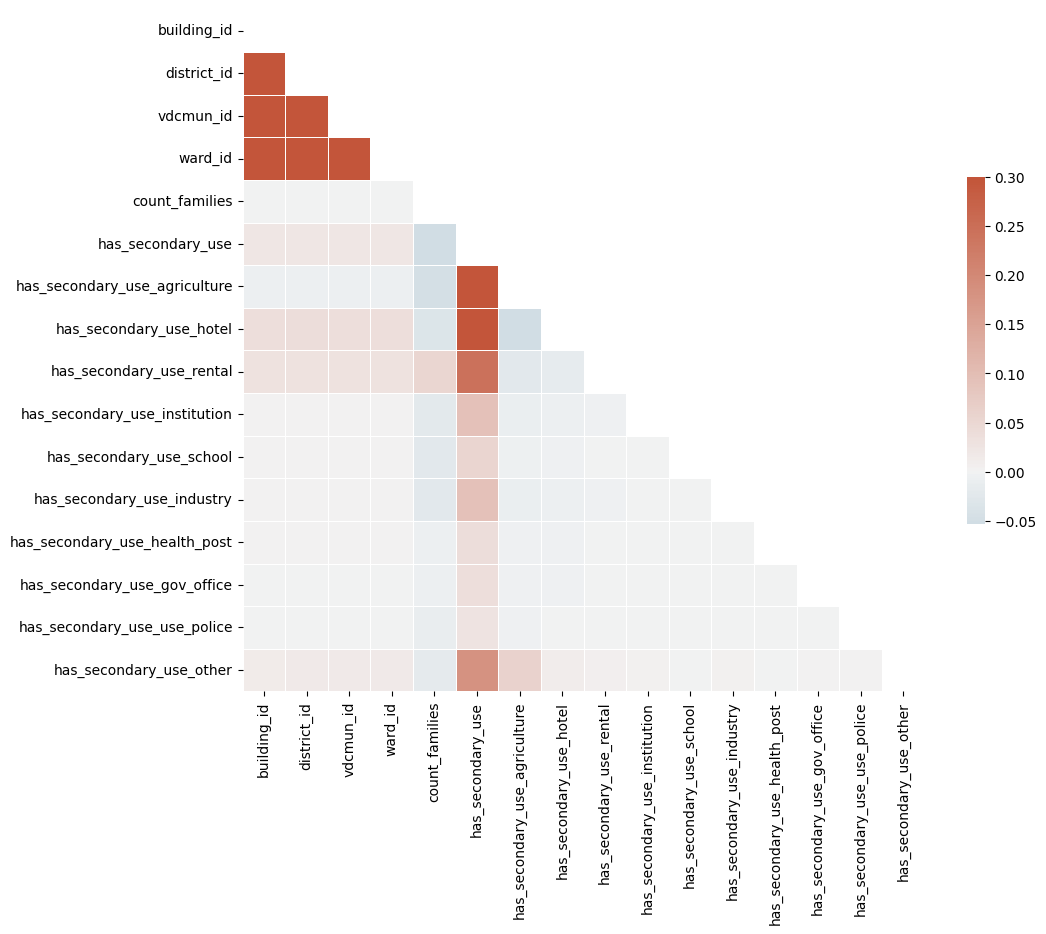

In [45]:
# Compute the correlation matric
corr = building_use_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom divering colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### From the correlation heatmap it is clearly observed that the feature has_secondary_use is correlated with the other features. It may be best that this feature is dropped.

In [46]:
building_use_df['has_secondary_use'].value_counts()


0.0    669732
1.0     92364
Name: has_secondary_use, dtype: int64

#### About 12% or 92364 building structures have a secondary use.



In [47]:
building_use_df.drop(['count_families'], axis=1, inplace=True)


In [48]:
building_use_df.describe()


,building_id,district_id,vdcmun_id,ward_id,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762096.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,0.121197,0.071859,0.035090,0.008264,0.001161,0.000424,0.001164,0.000227,0.000186,0.000097,0.004490
std,5.801855e+10,5.807555,581.172767,58117.348412,0.326357,0.258254,0.184006,0.090530,0.034057,0.020583,0.034096,0.015065,0.013649,0.009853,0.066858
min,1.201010e+11,12.000000,1201.000000,120101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Based in the descriptive statistics, no problems show in the range, main or standard deviations statistics for all the features. The count is equal to 762106 and equal across all features i.e., no missing values.

# Building Structure data


In [49]:
building_structure_df.shape


(762106, 31)

#### The building structure dataset has 762106 observations and 31 features. Each row in the dataset represents a building that was surveyed, and gives information on the building construction structure.

In [50]:
building_structure_df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [51]:
building_structure_df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [52]:
building_structure_df.isna().sum()


building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

#### There are 4 features in the dataset with missing values. position feature is missing 1 value, plan_configuration feature is also missing 1 value, damage_grade is missing 12 values and technical_solution_proposed is also missing 12 values.

In [53]:
building_structure_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

##### The building structure dataframe has 762106 observations and 31 features. There are 10 features as pandas object data type while the rest are of numeric dtype. The next steps will be to look at the object type features and explore if they should and can be converted to numeric dtype.

In [54]:
round(building_structure_df['land_surface_condition'].value_counts(normalize=True)*100,2)


Flat              82.89
Moderate slope    13.86
Steep slope        3.25
Name: land_surface_condition, dtype: float64

#### About 83% of the buildings in the dataset are on a flat land surface, while 14% of buildings sit on a moderate sloping land surface and about 3% buildings are on a steep sloping land surface. To convert to numeric datatype, we will assign the labels in order as a range from 1 to 3.

In [57]:
building_structure_df['foundation_type'].value_counts()


Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [58]:
round(building_structure_df['roof_type'].value_counts(normalize=True)*100,2)


Bamboo/Timber-Light roof    66.10
Bamboo/Timber-Heavy roof    28.05
RCC/RB/RBC                   5.85
Name: roof_type, dtype: float64

#### About 66% of the buildings in the dataset have a bamboo or light timber roofing, while 28% have a bamboo or heavy timber roofing and only about 6% have a modern structural designed roof type with RCC (Reinforced Cement Concrete or RBC (Reinforced Brick Concrete) or RB (Reinforced Brick).

In [59]:
building_structure_df['ground_floor_type'].value_counts()


Mud            618217
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [60]:
building_structure_df['other_floor_type'].value_counts()


TImber/Bamboo-Mud    486907
Timber-Planck        123635
Not applicable       118822
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [61]:
building_structure_df[building_structure_df['position'].isna()]


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
131652,212402000341,21,2107,210703,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN


In [62]:
building_structure_df['position'].value_counts()


Not attached       604453
Attached-1 side    129432
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

In [63]:
building_structure_df['position'].unique()


array(['Not attached', 'Attached-1 side', 'Attached-2 side',
       'Attached-3 side', nan], dtype=object)

In [64]:
building_structure_df['plan_configuration'].unique()


array(['Rectangular', 'L-shape', 'Square', 'T-shape', 'Multi-projected',
       'H-shape', 'U-shape', 'Others', 'E-shape',
       'Building with Central Courtyard', nan], dtype=object)

#### position gives the position of the building and plan_configuration gives the building plan configuration. For the null values in these columns, will look for rows with similar rows with similar values.

In [65]:
building_structure_df['plan_configuration'].value_counts()


Rectangular                        731257
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [66]:
building_structure_df[building_structure_df['position']=='Not attached'].head(2)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction


In [68]:
building_structure_df[building_structure_df['position']=='Attached-1 side'].head()


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
60,120102000011,12,1207,120703,3,3,30,375,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Not used,Grade 3,Major repair
62,120102000012,12,1207,120703,3,3,10,527,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,RC,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Not damaged,Grade 1,No need
99,120102000271,12,1207,120703,2,2,10,510,16,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Not damaged,Grade 1,No need
100,120102000281,12,1207,120703,2,2,70,380,16,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Not damaged,Grade 1,Minor repair
193,120103000111,12,1207,120703,3,3,15,384,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Grade 3,Major repair


In [69]:
building_structure_df[building_structure_df['position']=='Attached-2 side'].head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
1406,120209000511,12,1205,120502,2,2,22,356,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
1477,120301000321,12,1208,120801,2,2,27,500,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,1,0,0,0,0,0,1,0,0,0,0,Damaged-Used in risk,Grade 2,Minor repair
1478,120301000331,12,1208,120801,2,2,20,400,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-2 side,Rectangular,1,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Grade 2,Minor repair
2521,120309001081,12,1208,120801,1,1,12,250,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-2 side,Rectangular,1,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Grade 4,Reconstruction
2682,120402000601,12,1207,120705,2,2,16,580,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair


In [71]:
building_structure_df[building_structure_df['position']=='Attached-3 side'].head()


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
5361,120706000801,12,1202,120206,2,2,23,160,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-3 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
6311,120906000371,12,1207,120707,2,2,10,300,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Attached-3 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Grade 3,Reconstruction
12185,121702000211,12,1207,120706,2,2,46,350,16,16,Flat,Cement-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-3 side,Rectangular,0,1,0,0,0,1,0,0,0,0,0,Damaged-Used in risk,Grade 3,Major repair
14700,122104001151,12,1208,120809,1,1,8,200,6,6,Steep slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-3 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Not damaged,Grade 1,Minor repair
20217,122904000901,12,1205,120505,2,2,15,1026,14,14,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,Timber-Planck,Attached-3 side,Rectangular,0,0,0,1,0,0,0,0,0,0,0,Not damaged,Grade 1,No need


In [72]:
building_structure_df[building_structure_df['age_building'] >= 80].tail(10)


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
762021,366709000461,36,3603,360302,2,0,80,420,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
762029,366709000541,36,3603,360302,2,0,80,285,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
762030,366709000551,36,3603,360302,2,0,80,375,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
762032,366709000571,36,3603,360302,2,0,90,546,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
762035,366709000601,36,3603,360302,2,0,80,504,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762040,366709000651,36,3603,360302,2,0,100,420,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
762043,366709000681,36,3603,360302,2,0,90,462,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762046,366709000711,36,3603,360302,2,0,90,210,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
762047,366709000721,36,3603,360302,2,0,80,483,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction
762061,366709000861,36,3603,360302,2,0,80,506,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


### Based on similar buildings of around the same age, we can safely assign position Nan value as Not attached and plan_configuration Nan value as Rectangular.

In [73]:
building_structure_df['position'].fillna('Not attached', inplace=True)
building_structure_df['plan_configuration'].fillna('Rectangular', inplace= True)

In [74]:
building_structure_df['damage_grade'].value_counts()


Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

#### To get a better understanding of the scale direction, need to preview row information for each grade.B ased on the conditional data analysis above, the grade increase with the severity of the damage.

In [75]:
building_structure_df['condition_post_eq'].value_counts()


Damaged-Not used                           207968
Damaged-Rubble unclear                     125650
Damaged-Used in risk                       123849
Damaged-Repaired and used                  107797
Damaged-Rubble clear                       102191
Not damaged                                 61139
Damaged-Rubble Clear-New building built     33130
Covered by landslide                          382
Name: condition_post_eq, dtype: int64

In [76]:
building_structure_df[building_structure_df['damage_grade'].isna()]


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
83766,203202000521,20,2009,200910,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131558,212402000211,21,2107,210703,2,2,22,456,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131579,212402000221,21,2107,210703,2,2,22,439,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131627,212402000071,21,2107,210703,2,2,4,456,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131629,212402000091,21,2107,210703,2,2,55,182,11,11,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131640,212402000201,21,2107,210703,2,2,3,528,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131652,212402000341,21,2107,210703,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131654,212402000361,21,2107,210703,2,2,7,450,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131655,212402000371,21,2107,210703,2,2,22,324,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131656,212402000381,21,2107,210703,2,2,11,360,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN


#### In investigating structure damage features in the damage assessment data, all the rows with NaN values for damage_grade showed no damage information for any of those buildings. It is safe to assign the Nan values as Grade 1 to show minimal or no damage.

In [77]:
building_structure_df['damage_grade'].values


array(['Grade 3', 'Grade 5', 'Grade 2', ..., 'Grade 5', 'Grade 5',
       'Grade 5'], dtype=object)

In [78]:
building_structure_df['damage_grade'].values[building_structure_df['damage_grade'].isna()] = 'Grade 1'


In [79]:
building_structure_df['technical_solution_proposed'].values[building_structure_df['technical_solution_proposed'].isna()] = 'Minor repair'


In [80]:
building_structure_df.isna().sum()


building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [81]:
building_structure_df['technical_solution_proposed'].value_counts()


Reconstruction    470219
Major repair      129415
Minor repair      110617
No need            51855
Name: technical_solution_proposed, dtype: int64

In [82]:
target_df= building_structure_df[['damage_grade','technical_solution_proposed']]
solution_list = building_structure_df['technical_solution_proposed'].value_counts().index

In [83]:
for sol in solution_list:
    print('Grade proportion for {}'.format(sol))
    print(round(target_df[target_df['technical_solution_proposed']== sol]['damage_grade'].value_counts(normalize=True)*100,2))

Grade proportion for Reconstruction
Grade 5    58.61
Grade 4    35.40
Grade 3     5.44
Grade 2     0.51
Grade 1     0.04
Name: damage_grade, dtype: float64
Grade proportion for Major repair
Grade 3    78.27
Grade 4    13.30
Grade 2     8.02
Grade 1     0.30
Grade 5     0.11
Name: damage_grade, dtype: float64
Grade proportion for Minor repair
Grade 2    66.89
Grade 1    24.37
Grade 3     8.56
Grade 4     0.16
Grade 5     0.03
Name: damage_grade, dtype: float64
Grade proportion for No need
Grade 1    98.90
Grade 2     0.94
Grade 3     0.11
Grade 5     0.03
Grade 4     0.02
Name: damage_grade, dtype: float64


##### What would be the best general proxy for “overall building damage”?

###### Define on internet:

###### Grade 1 : Hairline to thin cracks in plaster on few walls, falling of plaster bits in limited parts, fall of loose stone from upper part of the building in a few cases, only architectural repairs needed.

###### Grade 2 : Cracks in many walls, falling of plaster in last bits over large area, damage to non structural parts like chimney, projecting cornices. The load carrying capacity of the building is not reduced appreciably.

###### Grade 3 : Large and extensive cracks in most walls, collapse of small portion of non load-bearing walls, roof tile detachment, tilting or failing of chimneys, failure of individual non-structural elements such as partition/gable walls, delamination of stone/adobe walls, load carrying capacity of structure is partially reduced and significant structural repair is required.

###### Grade 4 : Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.

###### Grade 5 : Total or near collapse of the building

##### So if Grade 5 is a building of total or near collapse it would make sense for the technical solution to be a proposition of Reconstruction or at the least Major Repairs. However, in the data we see that there are several buildings (41 in total) that are given a proposition of either Minor Repairs or No repairs needed at all even.

##### Similarly if a Grade 1 building is one with hairline cracks, falling plaster bits, one that is suggestive of only architectual repairs needed. Then, you could expect the technical solution proposed to be of Minor repairs. However, some Grade 1 graded buildings have been proposed to be reconstructed or go through major repairs.

##### So, each proposition of Reconstruction or, Major repairs or, Minor repairs or, No need have varying degrees but some composition of building damage grades. One reason for the variations in the observed data could be because of many perceptions (multiple suveyors) being involved in the decisions to how damaged and what repair across survey regions. Also, since the surveyors had to eyeball their damage grades and also the proposed technical solutions it makes sense that their grading is so varied across what solution was proposed.

In [84]:
building_structure_df['target']= building_structure_df['damage_grade'].map({'Grade 1': 1,
                                                                           'Grade 2': 1,
                                                                           'Grade 3': 2,
                                                                           'Grade 4': 3,
                                                                           'Grade 5': 3})

In [85]:
building_structure_df['target'].dtype


dtype('int64')

In [86]:
drop_list = ['damage_grade','count_floors_post_eq','condition_post_eq', 'height_ft_post_eq', 'technical_solution_proposed']


In [87]:
building_structure_df.drop(drop_list, axis=1, inplace=True)


In [88]:
building_structure_df.describe()


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,target
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,24.326405,406.672576,16.049372,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026,2.385151
std,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,65.043704,226.779371,5.493878,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001,0.820162
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,9.000000,280.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,16.000000,358.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,27.000000,470.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,999.000000,5000.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


##### According to the descriptive statistics, the oldest building is 999 years old and the newest is 0 years old. 



In [89]:
print('Number of 999 year old :',building_structure_df.loc[building_structure_df['age_building']== 999]['age_building'].count())
print('Number of 99 year old :',building_structure_df.loc[building_structure_df['age_building']== 99]['age_building'].count())

Number of 999 year old : 3145
Number of 99 year old : 482


<AxesSubplot:>

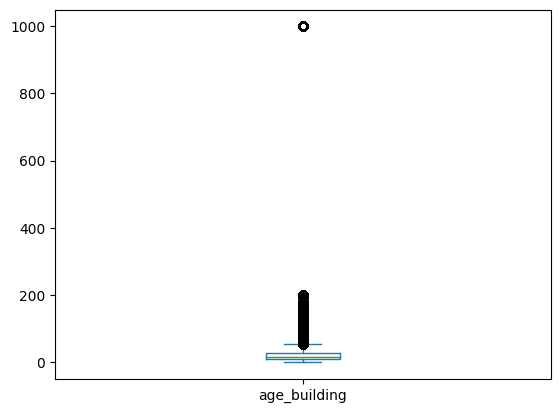

In [90]:
building_structure_df['age_building'].plot(kind='box')


### It seems that age 999 year might be an outlier. This may actually be 99 year old buildings.



In [91]:
building_structure_df.loc[(building_structure_df['age_building']== 999), 'age_building']=99


In [92]:
new_df = pd.merge(building_structure_df, geotech_risk_df, how= 'left', 
                  on = ['building_id', 'district_id', 'vdcmun_id', 'ward_id'], validate= 'one_to_one')

In [93]:
new_df.columns


Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'target', 'has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_rock_fall', 'has_geotec

In [94]:
building_df = pd.merge(new_df,building_use_df, how= 'left', 
                  on = ['building_id', 'district_id', 'vdcmun_id', 'ward_id'], validate= 'one_to_one')

### Isolating the true ward ids and the municipality ids.



In [95]:
building_df['ward_id'] = building_df['ward_id']-(building_df['vdcmun_id']*100)

building_df['vdcmun_id'] = building_df['vdcmun_id']-(building_df['district_id']*100)

In [96]:
building_df.drop(['building_id'], axis=1, inplace=True)


In [97]:
building_df.tail()


,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,target,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other,legal_ownership_status,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
762101,36,3,2,2,60,165,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,Private,0.0,0,0,0,0,0,0,0,0,0,0
762102,36,3,2,2,35,342,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,Private,0.0,0,0,0,0,0,0,0,0,0,0
762103,36,3,2,2,35,342,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,Private,0.0,0,0,0,0,0,0,0,0,0,0
762104,36,3,2,2,19,306,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,Private,0.0,0,0,0,0,0,0,0,0,0,0
762105,36,3,2,2,12,840,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,Private,0.0,0,0,0,0,0,0,0,0,0,0


In [98]:
y = building_df['target']


In [99]:
building_df.columns


Index(['district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'target', 'has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_rock_fall', 'has_geotechnical_risk_flo

In [ ]:
print(eda.valuecounts('count_floors_pre_eq', building_df))
eda.box_hist(building_df, 'count_floors_pre_eq')